In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn import tree
from dtreeviz.trees import *

sns.set(style="darkgrid")
pd.set_option("display.precision", 10)

# Mengambil directory dan input file awal

In [17]:
cwd = os.getcwd()
input_dir = os.path.join(cwd, 'input')
output_dir = os.path.join(cwd, 'output')
features = os.path.join(output_dir, 'features_without_high_correlated_value.csv')
features_importance = os.path.join(output_dir, 'features_importance.csv')

---

# Mengambil data Features Importance

In [18]:
features_importance = pd.read_csv(features_importance)

In [19]:
features_importance

,features,score
0,amplitude__kurtosis,0.0662309506
1,amplitude__ratio_beyond_r_sigma__r_3,0.0653174927
2,amplitude__energy_ratio_by_chunks__num_segment...,0.0520284416
3,amplitude__energy_ratio_by_chunks__num_segment...,0.0472692829
4,amplitude__ratio_beyond_r_sigma__r_0.5,0.0362817475
...,...,...
102,"amplitude__fft_coefficient__attr_""abs""__coeff_24",0.0011656323
103,"amplitude__fft_coefficient__attr_""real""__coeff_6",0.0011443506
104,"amplitude__fft_coefficient__attr_""abs""__coeff_11",0.0011220683
105,"amplitude__fft_coefficient__attr_""abs""__coeff_77",0.0010346143


---

# Membaca hasil ekstraksi features

In [20]:
df = pd.read_csv(features)

Mengambil *features* sesuai dengan *features importance*

In [21]:
df = df[features_importance['features'].to_list()]

In [22]:
df

,amplitude__kurtosis,amplitude__ratio_beyond_r_sigma__r_3,amplitude__energy_ratio_by_chunks__num_segments_10__segment_focus_9,amplitude__energy_ratio_by_chunks__num_segments_10__segment_focus_3,amplitude__ratio_beyond_r_sigma__r_0.5,amplitude__binned_entropy__max_bins_10,amplitude__ratio_beyond_r_sigma__r_1,amplitude__lempel_ziv_complexity__bins_5,amplitude__ratio_beyond_r_sigma__r_2.5,"amplitude__fft_aggregated__aggtype_""kurtosis""",...,"amplitude__fft_coefficient__attr_""abs""__coeff_6","amplitude__fft_coefficient__attr_""abs""__coeff_63","amplitude__fft_coefficient__attr_""imag""__coeff_32",amplitude__c3__lag_2,"amplitude__fft_coefficient__attr_""abs""__coeff_80","amplitude__fft_coefficient__attr_""abs""__coeff_24","amplitude__fft_coefficient__attr_""real""__coeff_6","amplitude__fft_coefficient__attr_""abs""__coeff_11","amplitude__fft_coefficient__attr_""abs""__coeff_77","amplitude__fft_coefficient__attr_""abs""__coeff_41"
0,5.9596787552,0.022977023,0.0248113930,0.4695131897,0.4165834166,1.2171022359,0.2007992008,0.1408591409,0.035964036,44.9577530045,...,0.3063177095,6.5467884775,0.4574820921,0.0005522797,5.1398079693,0.9924944167,-0.1385669358,0.6231243232,13.2447280533,1.4930731486
1,10.8458527262,0.022000000,0.0093517693,0.3265442118,0.3710000000,1.0957101418,0.1660000000,0.0970000000,0.037000000,42.6081379104,...,0.6094837014,2.0392394056,0.5201640180,0.0000510172,2.6725055675,0.5467689231,0.5987435405,1.2743314033,2.1882288289,0.8870754426
2,3.7233895254,0.020000000,0.0321583306,0.3454570172,0.4700000000,1.3103420803,0.2210000000,0.1330000000,0.035000000,28.5812272014,...,0.7304004903,0.6884359606,-0.2011525950,0.0000291816,1.9863402835,0.5168885738,0.6205088598,1.3344527000,11.6769114506,1.7373352653
3,5.2847552092,0.019000000,0.0115551234,0.3567146921,0.4180000000,1.1427854549,0.2150000000,0.1350000000,0.031000000,37.8872845142,...,1.1532892676,2.2615335409,0.5875429288,0.0000015538,1.5070606691,1.0778513618,1.0011337059,1.9266753002,2.6644804074,0.7012814897
4,2.9322988149,0.022000000,0.0138947955,0.3491768673,0.4160000000,1.6147284112,0.2090000000,0.1750000000,0.045000000,37.9860056990,...,0.1312714392,3.3982247074,1.1613885294,0.0008605909,5.7150594098,0.7184451116,-0.1262404513,0.5775065149,28.2563239173,2.0419071143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,0.0018996861,0.000999001,0.0400593453,0.1366882946,0.5914085914,1.8846058442,0.3126873127,0.1568431568,0.009990010,9.3193432181,...,7.7567066461,0.0901337630,-0.3543132010,-0.0000002876,0.3418442229,0.5345887133,-7.2082836736,0.8781654698,0.0692095268,0.1502609007
2110,1.0143742213,0.008000000,0.0307510079,0.1889252479,0.5120000000,1.7253983048,0.2890000000,0.1510000000,0.021000000,37.6298956498,...,0.7605238875,34.4180664159,0.0478796354,0.0004668998,7.1300090590,2.4420264425,0.6791921717,0.2114503551,15.1984399138,6.1629761534
2111,1.9562094686,0.014000000,0.0322291668,0.1232554300,0.5320000000,1.5483737507,0.2510000000,0.1620000000,0.024000000,31.4092530444,...,0.8797257704,2.2543401289,-0.2106981988,0.0000057346,1.6568546771,1.0761722583,0.8693269252,2.0079930291,1.3777239250,1.3597860838
2112,1.0444359043,0.008000000,0.0714661646,0.1139444613,0.5370000000,1.7228621425,0.2760000000,0.1650000000,0.025000000,24.0292167978,...,2.6342344137,19.0062282631,4.5711874356,0.0003760046,25.5648509457,1.9858887506,-1.7327208849,2.5186040406,14.5295670133,7.3386711581


Mengambil data target atau label

In [23]:
y = pd.read_csv(os.path.join(input_dir, 'label.csv'), index_col=0)
y = y['label']
y

1       1
2       1
3       1
4       1
5       1
       ..
2110    2
2111    2
2112    2
2113    2
2114    2
Name: label, Length: 2114, dtype: int64

Membagi data untuk *training* dan *test* model

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size = 0.3, random_state = 0)

In [25]:
rfc = RandomForestClassifier(
    n_estimators=100, 
    max_depth=5, 
    random_state=17
)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

In [26]:
print('Accuracy score with 100 decision-trees and FI : {0:0.4f}'.
      format(accuracy_score(y_test, y_pred)))
print('RMSE value with 100 decision-trees and FI : {0:0.4f}'. 
      format(np.sqrt(mean_squared_error(y_test, y_pred))))

Accuracy score with 100 decision-trees and FI : 0.9906
RMSE value with 100 decision-trees and FI : 0.0972


---

# Plotting Confusion Matrix menggunakan data FI

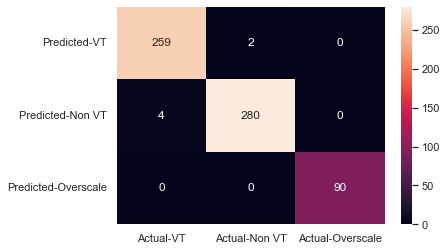

In [29]:
filename = os.path.join(output_dir, 'confusion_matriks_with_fi.tiff')

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual-VT', 'Actual-Non VT', 'Actual-Overscale'], 
                                 index=['Predicted-VT', 'Predicted-Non VT', 'Predicted-Overscale'])

sns.heatmap(cm_matrix, annot=True, fmt='d')
plt.savefig(filename, dpi=150, bbox_inches='tight')
plt.show()

---

# Menyimpan hasil setiap Decision Tree

In [30]:
def save_tree(index, pohon, output_dir):
    filename = os.path.join(output_dir,'tree_{}.png'.format(index))
    fig = plt.figure(figsize=(20,12))
    tree.plot_tree(
        pohon,
        filled=True,
        class_names=["vt", "non-vt","overscale"],
        fontsize=12,
        node_ids=True,
    )

    fig.savefig(filename, bbox_inches='tight')
    plt.close()

In [31]:
def save_dtreevis(index, pohon, output_dir):
    filename = os.path.join(output_dir,'tree_{}.svg'.format(index))
    
    viz = dtreeviz(
        pohon, 
        X_train, 
        y_train,
        target_name='target',
        feature_names=X_train.columns.to_list(), 
        class_names=["vt", "non-vt","overscale"],
        title="VT Auto Classification",
        title_fontsize=16,
        scale=1.5,
        histtype='bar',
        orientation='LR',
    )

    viz.save(filename)

In [ ]:
save_dir = os.path.join(output_dir, 'trees_with_fi')
save_dir_dtree = os.path.join(output_dir, 'dtreeviz')

tree_list = rfc.estimators_

for index, pohon in enumerate(tree_list):
    save_dtreevis(index, pohon, save_dir_dtree)
    save_tree(index, pohon, save_dir)